# Bayesian Machine Learning - HW1
mr3523

## Naive Bayes Implementation

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
## Load data.
data = sio.loadmat('data/mnist_mat.mat')
ytrain = data['ytrain']
Xtrain = data['Xtrain']
ytest = data['ytest']
Xtest = data['Xtest']

## Define parameters.
a = 1; b = 1; c = 1; d = 1; e = 1; f = 1
d = 1/a

In [3]:
## Prior function.
def y_prior(y_s, e, f, ytrain):
    ind = np.sum(ytrain == y_s)
    N = len(ytrain[0])
    prior = float(e + ind)/(N + e + f)
    return prior

In [22]:
## Likelihood function.
def log_likelihood(x_s, y_s, b, c, d, Xtrain, ytrain):
    
    ## Data and sample statistics.
    dat = Xtrain[:, np.where(ytrain[0] == y_s)].T
    s = np.sqrt(np.var(dat, axis = 0))
    x_mean = np.mean(dat, axis = 0)
    
    ## First term - numerator.
    N = Xtrain[np.where(ytrain == y_s)].shape[0]
    alpha1 = N/2. + b + 0.5
    n1 = alpha1 - 1
    num1 = n1 * np.log(n1) - n1 + np.log(n1*(1+4*n1*(1+2*n1)))/6 + np.log(np.pi)/2
    
    ## Second term - numerator.
    num2 = 0.5 * np.log(d + N)
    
    ## Third term - numerator.
    num3 = (N/2 + b) * np.log(c + 0.5 * (N * s + (d * N * x_mean**2) / (N + d)))
    
    ## Combining them.
    numerator = num1 + num2 + num3
    
    ## First term - denominator.
    alpha2 = N/2. + b
    n2 = alpha2 - 1
    dem1 = n2 * np.log(n2) - n2 + np.log(n2*(1+4*n2*(1+2*n2)))/6 + np.log(np.pi)/2
    
    ## Second term - denominator.
    dem2 = 0.5 * np.log(2 * np.pi * (1 + N + d))
    
    ## Third term - denominator.
    xi_sum = np.sum(dat, axis = 0)
    beta = ((x_s**2 + xi_sum**2) / 2) - (x_s + xi_sum)**2 / (2*(1 + N + d)) + c
    #dem3 = alpha1 * np.sum(np.log(beta))
    dem3 = alpha1 * np.log(beta)
    
    ## Combining them.
    denominator = dem1 + dem2 + dem3
    
    ## Output.
    result = np.sum(numerator - denominator)
    return result

In [44]:
def naive_bayes(x_s, b, c, d, e, f, Xtrain, ytrain):
    prob0 = log_likelihood(x_s, 0, b, c, d, Xtrain, ytrain) + np.log(y_prior(0, e, f, ytrain))
    prob1 = log_likelihood(x_s, 1, b, c, d, Xtrain, ytrain) + np.log(y_prior(1, e, f, ytrain))
    return prob1 < prob0

In [45]:
ypred = []
for i in range(ytest.shape[1]):
    ypred.append(int(naive_bayes(Xtest[:, i], b, c, d, e, f, Xtrain, ytrain)))

## Confusion Matrix

In [46]:
confusion_matrix(ytest[0], ypred)

array([[   0,  982],
       [   0, 1009]])

## Misclassified Digits

In [128]:
img1 = np.dot(Xtest[:, np.where(ytest[0] == 0)].reshape(15, 982)[:,0], data['Q'].T).reshape(28,28)
img2 = np.dot(Xtest[:, np.where(ytest[0] == 0)].reshape(15, 982)[:,0], data['Q'].T).reshape(28,28)
img3 = np.dot(Xtest[:, np.where(ytest[0] == 0)].reshape(15, 982)[:,0], data['Q'].T).reshape(28,28)

ValueError: total size of new array must be unchanged

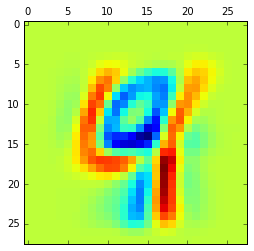

In [125]:
plt.matshow(img1);

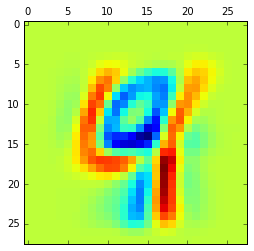

In [126]:
plt.matshow(img2);

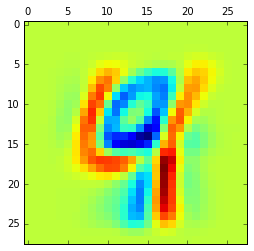

In [127]:
plt.matshow(img3);